In [1]:
import xray
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
http://www.ncdc.noaa.gov/data-access/marineocean-data/extended-reconstructed-sea-surface-temperature-ersst-v4
ds = xray.open_dataset('http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/.version4/anom/.sst/T/(days%20since%201960-01-01)/streamgridunitconvert/dods')

ds.T

<xray.Dataset>
Dimensions:  (T: 1939, X: 180, Y: 89, zlev: 1)
Coordinates:
  * X        (X) float32 0.0 2.0 4.0 6.0 8.0 10.0 12.0 14.0 16.0 18.0 20.0 ...
  * zlev     (zlev) float32 0.0
  * Y        (Y) float32 -88.0 -86.0 -84.0 -82.0 -80.0 -78.0 -76.0 -74.0 ...
  * T        (T) datetime64[ns] 1854-01-16T12:00:00 1854-02-15 ...
Data variables:
    sst      (X, Y, zlev, T) float64 nan nan nan nan nan nan nan nan nan nan ...
Attributes:
    Conventions: IRIDL

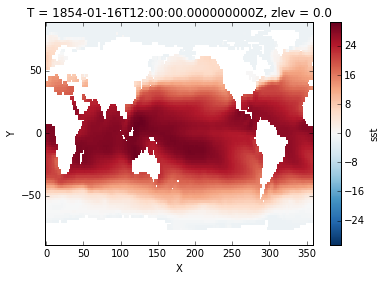

In [7]:
xray.plot.pcolormesh(ds['sst'][0,0])

In [10]:
#The Niño 3.4 Region is bounded by 120°W-170°W and 5°S- 5°N.
sst_n34 = ds.sst.sel(X=slice(190,240), Y=slice(-5,5), zlev=0)

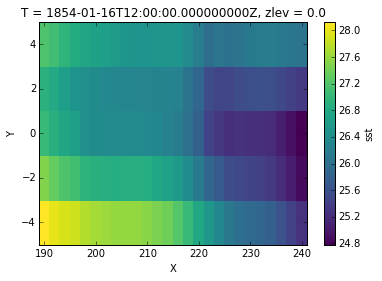

In [13]:
xray.plot.pcolormesh(sst_n34[0])

In [17]:
n34idx = sst_n34.mean(dim=('X','Y')) - sst_n34.mean(dim=('X','Y','T'))

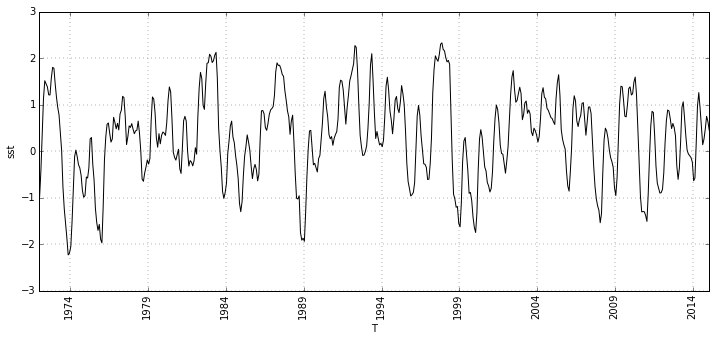

In [22]:
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)

xray.plot.plot(n34idx, ax=ax)
ax.set_xlim(['1972-01,01','2015-01-01'])
ax.grid()

In [110]:
sst_pac = ds.sst.sel(X=slice(120,300), Y=slice(-30,30),
                     T=slice('1950-01-1','2015-01-01'), zlev=0)
ssta_pac = sst_pac - sst_pac.mean(dim='T')

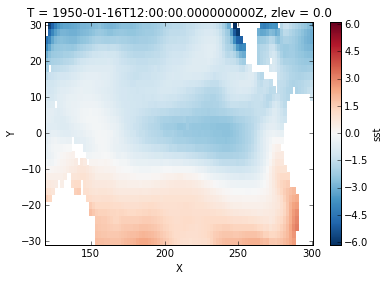

In [116]:
xray.plot.pcolormesh(ssta_pac[0])

In [117]:
a = np.ma.masked_invalid(nssta_pac.values.copy()).filled(0.)
a -= a.mean()
a /= a.std()
print(a.mean(), a.std())

-1.22967248283e-17 1.0


In [118]:
Nt, Ny, Nx = a.shape
a.shape = (Nt, Ny*Nx)

In [119]:
u, s, v = np.linalg.svd(a, full_matrices=False)
print(u.shape, v.shape, s.shape)

S = np.diag(s)
np.allclose(a, np.dot(u, np.dot(S, v)))

sst_pat = np.reshape(v, (Nt,Ny,Nx))

(780, 780) (780, 2821) (780,)


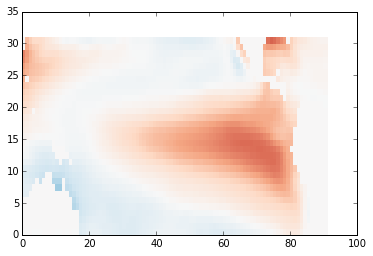

In [134]:
plt.pcolormesh(sst_pat[1], cmap='RdBu_r')
plt.clim([-0.1,0.1])

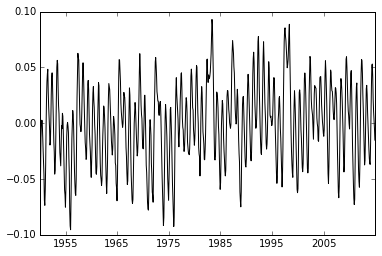

In [89]:
plt.plot(sst_pac['T'], u[:,1])

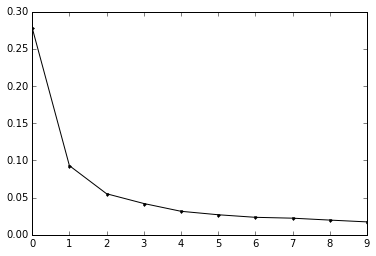

In [129]:
plt.plot(s[:10] / s.sum(),'.-')

In [5]:
# has weird -999 values in sea ice :( boo
#ds = xray.open_dataset('http://oceanwatch.pfeg.noaa.gov/thredds/dodsC/HadleyCenter/HadISST')

# ValueError: unable to decode time units 'days since 1800-1-1 00:00:00' with the default calendar.
# Try opening your dataset with decode_times=False.
# CRAP!
#ds = xray.open_dataset('http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst/sst.mon.1971-2000.ltm.v4.nc')

# 360 day calendar3
#ds = xray.open_dataset('http://iridl.ldeo.columbia.edu/SOURCES/.KAPLAN/.EXTENDED/.v2/.ssta/dods')
#ds = xray.open_dataset('http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/.version4/anom/dods',
#                       decode_times=False)



In [127]:
np.sqrt((a**2).sum()) * 2

2966.7355797239511